# Move Pipeline Preparation

### 1. Import libraries and load datasets.
- Import Python libraries
- Load `tmdb_credits.csv` into a dataframe and inspect the first few lines.
- Load `tmdb_movies.csv` into a dataframe and inspect the first few lines.

In [1]:
# import libraries
import pandas as pd
import numpy as np
import sqlite3
import sqlalchemy
from sqlalchemy import create_engine
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import ast

In [2]:
# load credits dataset
credits = pd.read_csv("data/tmdb_credits.csv")
credits.head(2)

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."


In [3]:
# load movies dataset
movies = pd.read_csv("data/tmdb_movies.csv")
movies.head(2)


,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500


In [4]:
# movies.rename(columns = {"id": "movie_id"}, 
#           inplace = True)
# movies.head(2)

### 2. Merge datasets.
- Merge the credits and movies datasets using the common id or title
- Assign this combined dataset to `df`, which will be cleaned in the following steps

In [5]:
# credits.columns

In [6]:
# movies.columns

In [7]:
# merge datasets
movies = credits.merge(movies, how ='outer', on =['title'])
movies.head(2)

,movie_id,title,cast,crew,budget,genres,homepage,id,keywords,original_language,...,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,vote_average,vote_count
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...",237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,...,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,7.2,11800
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de...",300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,...,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",6.9,4500


In [8]:
movies.dtypes

movie_id                  int64
title                    object
cast                     object
crew                     object
budget                    int64
genres                   object
homepage                 object
id                        int64
keywords                 object
original_language        object
original_title           object
overview                 object
popularity              float64
production_companies     object
production_countries     object
release_date             object
revenue                   int64
runtime                 float64
spoken_languages         object
status                   object
tagline                  object
vote_average            float64
vote_count                int64
dtype: object

In [16]:
movies_plotly = movies[['movie_id','budget','popularity','runtime','vote_average','vote_count','revenue']]
movies_plotly=movies_plotly.astype(float)
movies_plotly.head(3)
movies_plotly.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4809 entries, 0 to 4808
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   movie_id      4809 non-null   float64
 1   budget        4809 non-null   float64
 2   popularity    4809 non-null   float64
 3   runtime       4807 non-null   float64
 4   vote_average  4809 non-null   float64
 5   vote_count    4809 non-null   float64
 6   revenue       4809 non-null   float64
dtypes: float64(7)
memory usage: 300.6 KB


In [10]:
# movies.columns

In [11]:
movies.shape

(4809, 23)

### select useful feature


In [274]:
movies = movies[['movie_id','title','overview','genres','keywords','cast','crew']]
movies.head(3)

,movie_id,title,overview,genres,keywords,cast,crew
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di...","[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...","[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...","[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...","[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...","[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,A cryptic message from Bond’s past sends him o...,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...","[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."


In [275]:
movies.shape

(4809, 7)

### 6. Remove duplicates.
- Check how many duplicates are in this dataset.
- Check Null .
- drop Null.

In [276]:
movies_plotly.isnull().sum()

movie_id        0
title           0
budget          0
popularity      0
runtime         2
vote_average    0
vote_count      0
revenue         0
dtype: int64

In [278]:
movies_plotly.dropna(inplace=True)

movie_id    0
title       0
overview    3
genres      0
keywords    0
cast        0
crew        0
dtype: int64


<AxesSubplot:>

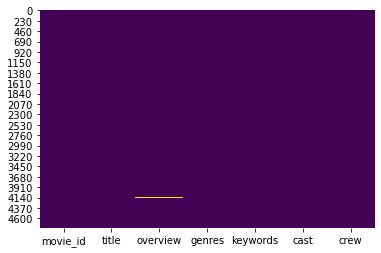

In [279]:
print(movies.isnull().sum())
sns.heatmap(movies.isnull(),cbar=False, cmap='viridis')

In [280]:
movies.dropna(inplace=True)

In [281]:
movies.isnull().sum()

movie_id    0
title       0
overview    0
genres      0
keywords    0
cast        0
crew        0
dtype: int64

In [282]:
movies_plotly.isnull().sum()

movie_id        0
title           0
budget          0
popularity      0
runtime         0
vote_average    0
vote_count      0
revenue         0
dtype: int64

### Data Cleaning

In [283]:
def convert(text):
    L = []
    for i in ast.literal_eval(text):
        L.append(i['name']) 
    return L

In [284]:
movies['genres'] = movies['genres'].apply(convert)
movies['keywords'] = movies['keywords'].apply(convert)
movies['cast'] = movies['cast'].apply(convert)
movies['crew'] = movies['crew'].apply(convert)

In [285]:
movies.head(3)

,movie_id,title,overview,genres,keywords,cast,crew
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di...","[Action, Adventure, Fantasy, Science Fiction]","[culture clash, future, space war, space colon...","[Sam Worthington, Zoe Saldana, Sigourney Weave...","[Stephen E. Rivkin, Rick Carter, Christopher B..."
1,285,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...","[Adventure, Fantasy, Action]","[ocean, drug abuse, exotic island, east india ...","[Johnny Depp, Orlando Bloom, Keira Knightley, ...","[Dariusz Wolski, Gore Verbinski, Jerry Bruckhe..."
2,206647,Spectre,A cryptic message from Bond’s past sends him o...,"[Action, Adventure, Crime]","[spy, based on novel, secret agent, sequel, mi...","[Daniel Craig, Christoph Waltz, Léa Seydoux, R...","[Thomas Newman, Sam Mendes, Anna Pinnock, John..."


In [286]:
movies['cast'] = movies['cast'].apply(lambda x:x[0:3])

In [287]:
movies['cast'].head()

0    [Sam Worthington, Zoe Saldana, Sigourney Weaver]
1       [Johnny Depp, Orlando Bloom, Keira Knightley]
2        [Daniel Craig, Christoph Waltz, Léa Seydoux]
3        [Christian Bale, Michael Caine, Gary Oldman]
4      [Taylor Kitsch, Lynn Collins, Samantha Morton]
Name: cast, dtype: object

### collapse blanks on data

In [288]:
def collapse(L):
    L1 = []
    for i in L:
        L1.append(i.replace(" ",""))
    return L1

In [289]:
movies['cast'] = movies['cast'].apply(collapse)
movies['crew'] = movies['crew'].apply(collapse)
movies['genres'] = movies['genres'].apply(collapse)
movies['keywords'] = movies['keywords'].apply(collapse)

In [290]:
movies.head()

,movie_id,title,overview,genres,keywords,cast,crew
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di...","[Action, Adventure, Fantasy, ScienceFiction]","[cultureclash, future, spacewar, spacecolony, ...","[SamWorthington, ZoeSaldana, SigourneyWeaver]","[StephenE.Rivkin, RickCarter, ChristopherBoyes..."
1,285,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...","[Adventure, Fantasy, Action]","[ocean, drugabuse, exoticisland, eastindiatrad...","[JohnnyDepp, OrlandoBloom, KeiraKnightley]","[DariuszWolski, GoreVerbinski, JerryBruckheime..."
2,206647,Spectre,A cryptic message from Bond’s past sends him o...,"[Action, Adventure, Crime]","[spy, basedonnovel, secretagent, sequel, mi6, ...","[DanielCraig, ChristophWaltz, LéaSeydoux]","[ThomasNewman, SamMendes, AnnaPinnock, JohnLog..."
3,49026,The Dark Knight Rises,Following the death of District Attorney Harve...,"[Action, Crime, Drama, Thriller]","[dccomics, crimefighter, terrorist, secretiden...","[ChristianBale, MichaelCaine, GaryOldman]","[HansZimmer, CharlesRoven, ChristopherNolan, C..."
4,49529,John Carter,"John Carter is a war-weary, former military ca...","[Action, Adventure, ScienceFiction]","[basedonnovel, mars, medallion, spacetravel, p...","[TaylorKitsch, LynnCollins, SamanthaMorton]","[AndrewStanton, AndrewStanton, JohnLasseter, C..."


### split 'overview' contet

In [291]:
movies['overview'] = movies['overview'].apply(lambda x:x.split())

In [292]:
movies['overview'].head()

0    [In, the, 22nd, century,, a, paraplegic, Marin...
1    [Captain, Barbossa,, long, believed, to, be, d...
2    [A, cryptic, message, from, Bond’s, past, send...
3    [Following, the, death, of, District, Attorney...
4    [John, Carter, is, a, war-weary,, former, mili...
Name: overview, dtype: object

### Combine texts in one column 

In [293]:
movies['tags'] = movies['overview'] + movies['genres'] + movies['keywords'] + movies['cast'] + movies['crew']

In [294]:
movies['tags'].head()

0    [In, the, 22nd, century,, a, paraplegic, Marin...
1    [Captain, Barbossa,, long, believed, to, be, d...
2    [A, cryptic, message, from, Bond’s, past, send...
3    [Following, the, death, of, District, Attorney...
4    [John, Carter, is, a, war-weary,, former, mili...
Name: tags, dtype: object

In [295]:
new = movies.drop(columns=['overview','genres','keywords','cast','crew'])
new.head()

,movie_id,title,tags
0,19995,Avatar,"[In, the, 22nd, century,, a, paraplegic, Marin..."
1,285,Pirates of the Caribbean: At World's End,"[Captain, Barbossa,, long, believed, to, be, d..."
2,206647,Spectre,"[A, cryptic, message, from, Bond’s, past, send..."
3,49026,The Dark Knight Rises,"[Following, the, death, of, District, Attorney..."
4,49529,John Carter,"[John, Carter, is, a, war-weary,, former, mili..."


### splitting recovery after combine data on tag column

In [296]:
new['tags'] = new['tags'].apply(lambda x: " ".join(x))
new['tags'].head()

0    In the 22nd century, a paraplegic Marine is di...
1    Captain Barbossa, long believed to be dead, ha...
2    A cryptic message from Bond’s past sends him o...
3    Following the death of District Attorney Harve...
4    John Carter is a war-weary, former military ca...
Name: tags, dtype: object

### Vectorizer applying on 'tags'

In [297]:
lv = TfidfVectorizer(max_features=5000,stop_words='english')

In [298]:
vector = lv.fit_transform(new['tags']).toarray()

In [299]:
similarity = cosine_similarity(vector)

In [300]:
print(similarity)

[[1.         0.04390212 0.00398467 ... 0.00336382 0.00352342 0.        ]
 [0.04390212 1.         0.0059673  ... 0.0157445  0.         0.        ]
 [0.00398467 0.0059673  1.         ... 0.01138166 0.         0.        ]
 ...
 [0.00336382 0.0157445  0.01138166 ... 1.         0.03606093 0.04642066]
 [0.00352342 0.         0.         ... 0.03606093 1.         0.0225261 ]
 [0.         0.         0.         ... 0.04642066 0.0225261  1.        ]]


In [301]:
def recommend(movie):
    index = new[new['title'] == movie].index[0]
    distances = sorted(list(enumerate(similarity[index])),reverse=True,key = lambda x: x[1])
    for i in distances[1:6]:
        print(new.iloc[i[0]].title)

In [302]:
recommend('Spectre')

Skyfall
Quantum of Solace
Die Another Day
Octopussy
Casino Royale


In [303]:
import pickle

pickle.dump(new,open('movie_list.pkl','wb'))
pickle.dump(similarity,open('similarity.pkl','wb'))

In [304]:
pickle.dump(movies_plotly,open('similarity.pkl','wb'))

###  Save the clean dataset into an sqlite database.

In [306]:
# engine = create_engine('sqlite:///InsertDatabaseName.db')
# df1.to_sql('credits_movie', engine, index=False, if_exists='replace')

In [307]:
engine = create_engine('sqlite:///InsertDatabaseNamemovie_list.db')
new.to_sql('new_movie', engine, index=False, if_exists='replace')

In [316]:
# movies_plotly
engine = create_engine('sqlite:///InsertDatabaseNamemovies_plotly.db')
movies_plotly.to_sql('moviesplotly', engine, index=False, if_exists='replace')

In [317]:
similarity.tolist

<function ndarray.tolist>

In [318]:
similaritydf=pd.DataFrame(similarity)

In [319]:
similaritydf.shape

(4806, 4806)